In [19]:
""" External Imports """
import maboss
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import sys
import yaml
import numpy as np
import re
import seaborn as sns
sys.path.append("/Users/emilieyu/endotehelial-masboss")

In [25]:
""" Global Setting Configuration """

PROJECT_ROOT = Path("/Users/emilieyu/endotehelial-masboss/")
CONFIG_PATH = PROJECT_ROOT / "config" / "rho_sim_config.yaml"
SWEEP_CONFIG_PATH = PROJECT_ROOT / "config" / "parameter_sweep_config.yaml"

with open(CONFIG_PATH, "r") as f:
    config = yaml.safe_load(f)

with open(SWEEP_CONFIG_PATH, "r") as f:
    sweep_config = yaml.safe_load(f)

# Result directory
RESULTS_DIR = PROJECT_ROOT / config['paths']['results_base']
FIG_DIR = PROJECT_ROOT / config['paths']['figures_base']

# Subdirectories to store parameter sweep / perturbation result
PARAM_DIR = RESULTS_DIR / config['paths']['subdirs']['param_sweep']
PERBS_DIR = RESULTS_DIR / config['paths']['subdirs']['perturbation_sim']
PERBS_FIG_DIR = FIG_DIR / config['paths']['subdirs']['perturbation_figs']
PARAM_FIG_DIR = FIG_DIR / config['paths']['subdirs']['param_sweep_figs']
PERBS_FIG_DIR.mkdir(parents=True, exist_ok=True)
PARAM_FIG_DIR.mkdir(parents=True, exist_ok=True)



In [26]:
perb_csv = PERBS_DIR / 'perturbation_timeseries.csv'
perb_raw = pd.read_csv(perb_csv)

In [37]:
param_csv = PARAM_DIR / 'param_sweep_full.csv'
param_df = pd.read_csv(param_csv)


## 1D Experiements Processing

In [29]:
def plot_1d_sensitivity(df, outdir=None):
    df_1d = df[df['exp_name'].str.contains('Sweep')].dropna(axis=1).copy()
    params = df_1d['p1_name'].unique()

    for p in params:
        plt.figure(figsize=(6, 4))
        data = df_1d[df_1d['p1_name'] == p]
        
        # Create the line plot
        sns.lineplot(
            data=data, x='p1_value', y='delta', 
            hue='perturbation', style='perturbation',
            markers=True, dashes=False
        )
        
        # Add Phenotype Shading (The "Zones")
        plt.axhspan(0.25, 1.0, color='blue', alpha=0.1, label='Hyper (RhoC)')
        plt.axhspan(-0.25, 0.25, color='gray', alpha=0.1, label='Normal (Balanced)')
        plt.axhspan(-1.0, -0.25, color='red', alpha=0.1, label='Failed (RhoA)')
        
        # Formatting
        plt.title(f"Sensitivity Analysis: {p}")
        plt.xlabel(f"Parameter Value: {p}")
        plt.ylabel("Balance ($\Delta = RhoC - RhoA$)")
        plt.ylim(-0.8, 0.8)
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8) # Zero line
        plt.tight_layout()

        if outdir is not None: 
            outpath = outdir/f"sensitivity_{p.replace('$', '')}.png"
            plt.savefig(outpath, dpi=300)

        plt.show()
        plt.close()



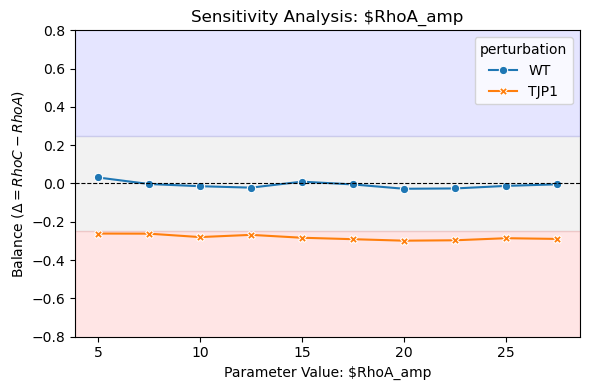

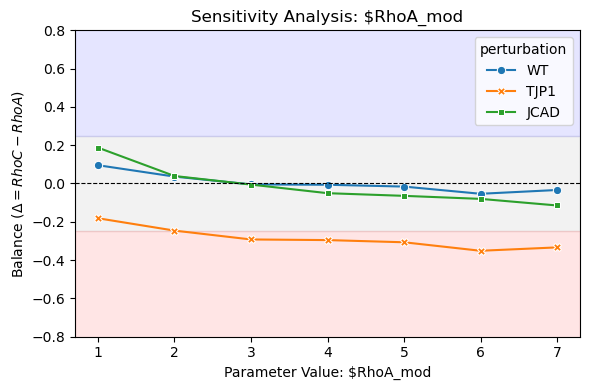

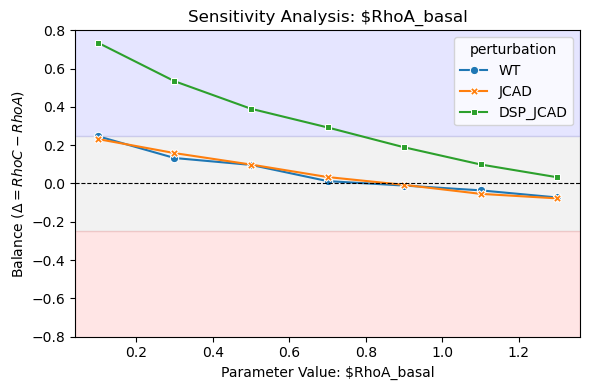

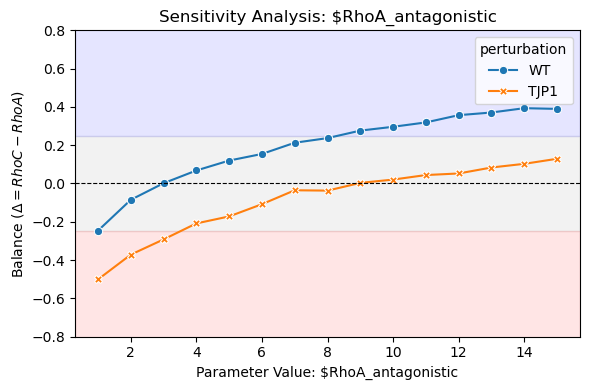

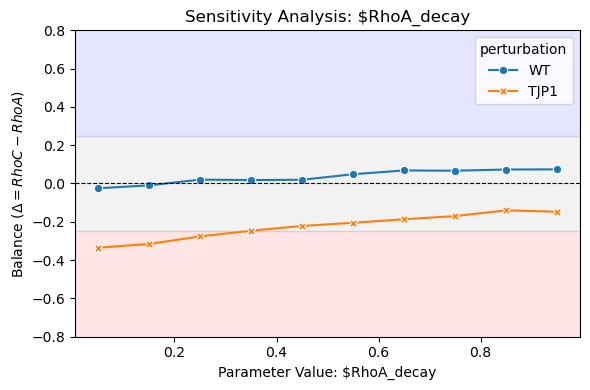

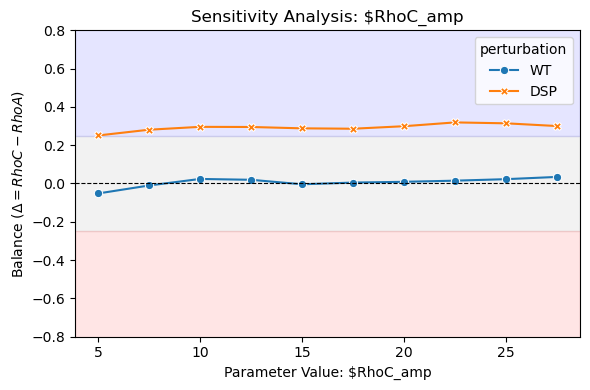

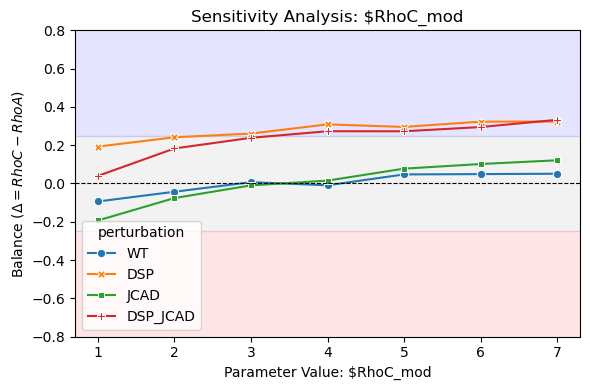

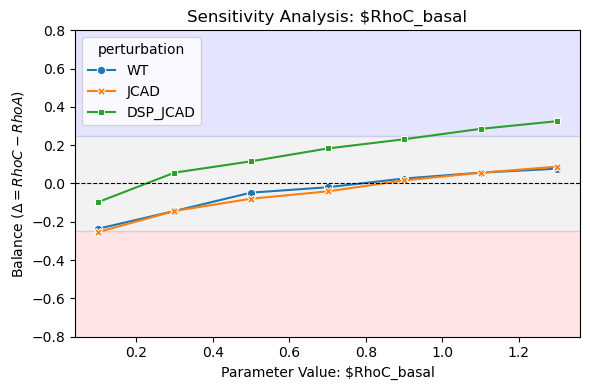

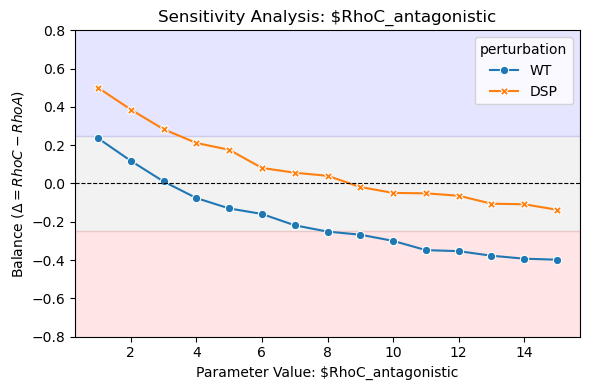

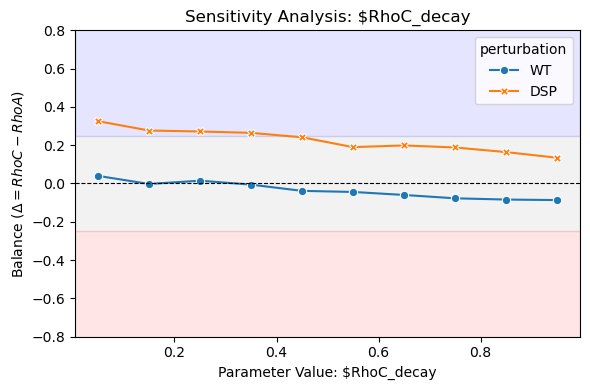

In [30]:
plot_1d_sensitivity(param_df, PARAM_FIG_DIR)

## 2D Param Sweep Processing

In [40]:
param_df
df_2d = param_df.dropna(how='all', subset=['p2_name', 'p2_value']).copy()
df_2d = df_2d.dropna(axis=1).copy()
comp_df = df_2d[df_2d['exp_name'] == 'Competition_Landscape']
comp_df

,RhoA,RhoC,p1_name,p1_value,p2_name,p2_value,perturbation,exp_name,delta,phenotype
231,0.711235,0.699637,$RhoA_antagonistic,1.0,$RhoC_antagonistic,1.0,WT,Competition_Landscape,-0.011598,Normal
232,0.748433,0.526823,$RhoA_antagonistic,1.0,$RhoC_antagonistic,3.0,WT,Competition_Landscape,-0.221610,Normal
233,0.780701,0.433195,$RhoA_antagonistic,1.0,$RhoC_antagonistic,5.0,WT,Competition_Landscape,-0.347506,Failed
234,0.798205,0.366520,$RhoA_antagonistic,1.0,$RhoC_antagonistic,7.0,WT,Competition_Landscape,-0.431685,Failed
235,0.812253,0.323807,$RhoA_antagonistic,1.0,$RhoC_antagonistic,9.0,WT,Competition_Landscape,-0.488446,Failed
...,...,...,...,...,...,...,...,...,...,...
418,0.227766,0.739358,$RhoA_antagonistic,15.0,$RhoC_antagonistic,7.0,DSP,Competition_Landscape,0.511592,Hyper
419,0.260063,0.701983,$RhoA_antagonistic,15.0,$RhoC_antagonistic,9.0,DSP,Competition_Landscape,0.441920,Hyper
420,0.276810,0.688718,$RhoA_antagonistic,15.0,$RhoC_antagonistic,11.0,DSP,Competition_Landscape,0.411908,Hyper
421,0.302229,0.666549,$RhoA_antagonistic,15.0,$RhoC_antagonistic,13.0,DSP,Competition_Landscape,0.364320,Hyper


In [41]:

comp_df_wt = comp_df[comp_df['perturbation'] == 'WT']
comp_df_wt

,RhoA,RhoC,p1_name,p1_value,p2_name,p2_value,perturbation,exp_name,delta,phenotype
231,0.711235,0.699637,$RhoA_antagonistic,1.0,$RhoC_antagonistic,1.0,WT,Competition_Landscape,-0.011598,Normal
232,0.748433,0.526823,$RhoA_antagonistic,1.0,$RhoC_antagonistic,3.0,WT,Competition_Landscape,-0.221610,Normal
233,0.780701,0.433195,$RhoA_antagonistic,1.0,$RhoC_antagonistic,5.0,WT,Competition_Landscape,-0.347506,Failed
234,0.798205,0.366520,$RhoA_antagonistic,1.0,$RhoC_antagonistic,7.0,WT,Competition_Landscape,-0.431685,Failed
235,0.812253,0.323807,$RhoA_antagonistic,1.0,$RhoC_antagonistic,9.0,WT,Competition_Landscape,-0.488446,Failed
...,...,...,...,...,...,...,...,...,...,...
290,0.418812,0.623557,$RhoA_antagonistic,15.0,$RhoC_antagonistic,7.0,WT,Competition_Landscape,0.204745,Normal
291,0.453920,0.577451,$RhoA_antagonistic,15.0,$RhoC_antagonistic,9.0,WT,Competition_Landscape,0.123531,Normal
292,0.472870,0.554594,$RhoA_antagonistic,15.0,$RhoC_antagonistic,11.0,WT,Competition_Landscape,0.081724,Normal
293,0.487551,0.541249,$RhoA_antagonistic,15.0,$RhoC_antagonistic,13.0,WT,Competition_Landscape,0.053698,Normal


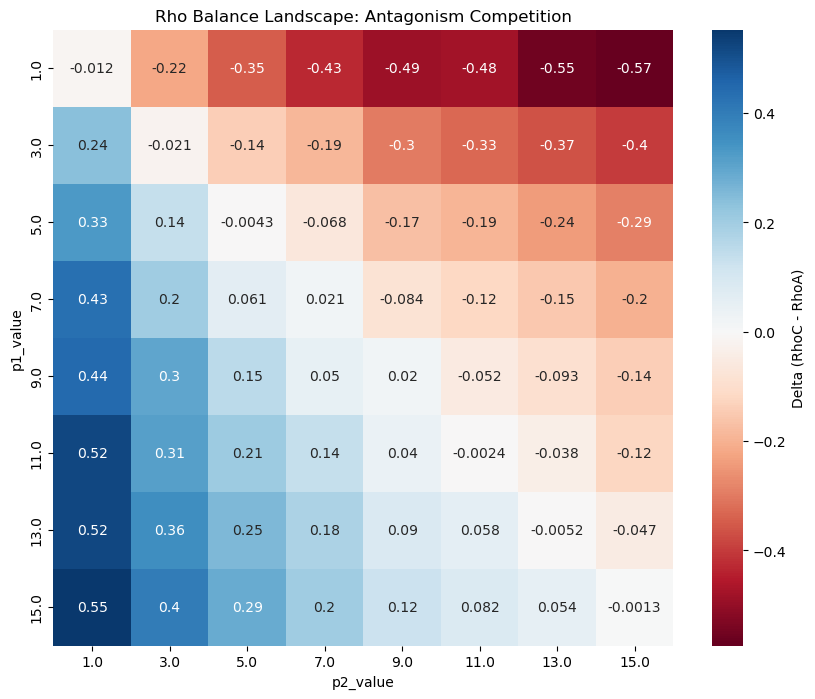

In [43]:

comp_pivot = comp_df_wt.pivot(index='p1_value', columns='p2_value', values='delta')
comp_pivot

plt.figure(figsize=(10, 8))
sns.heatmap(comp_pivot, 
            annot=True,       # Show values in cells
            cmap="RdBu",      # Red (A) to Blue (C)
            center=0,         # Force 0 to be the neutral color
            cbar_kws={'label': 'Delta (RhoC - RhoA)'})

plt.title("Rho Balance Landscape: Antagonism Competition")
plt.show()


## Perturbation Processing

In [ ]:
def plot_activation_single(perb, df, ax, set_ylim=True):
    """
    Plot RhoA/RhoC activation levels / probabilities for a single perturbation. 
    """
    ax.plot(df['t'], df['RhoA'], label=f"{perb} RhoA")
    ax.plot(df['t'], df['RhoC'], label=f"{perb} RhoC")

    if set_ylim:
        ax.set_ylim(0, 1)

    ax.set_xlabel('Time')
    ax.set_ylabel('Activation Level (Probability)')

    plt.tight_layout()


def plot_activation_prob(name, perb_list, data_dict, outdir=None, set_ylim=True, save=True):
    fig, ax = plt.subplots(figsize=(6,4))

    for perb in perb_list:
        plot_activation_single(perb, data_dict[perb], ax=ax, set_ylim=set_ylim)

    ax.set_title(f"{name}: RhoA/RhoC Activation Over Time")
    ax.legend()
    plt.tight_layout()

    if save and outdir is not None:
        file_name = name.replace(" ", "_")
        fig.savefig(outdir / f"{file_name}_rho_acivation_time.png", dpi=300)

    plt.show()
    plt.close(fig)

def plot_delta_single(perb, df, ax):
    """
    Plot Δ(t) for a single perturbation onto an existing axis.
    """

    ax.plot(df['t'], df["delta"], label=perb)

    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel("Time")
    ax.set_ylabel("Δ = P(RhoC) − P(RhoA)")


def plot_deltas(name, perb_list, data_dict, outdir=None, save=True):
    """
    Plot one or multiple perturbations' Δ(t) on the same axes.
    """
    fig, ax = plt.subplots(figsize=(6,4))

    # Plot each perturbation
    for perb in perb_list:
        plot_delta_single(perb, data_dict[perb], ax)

    # Add reference lines ONCE
    ax.axhline(0.25, linestyle="--", color='mistyrose')
    ax.axhline(-0.25, linestyle="--", color='mistyrose')
    ax.axhline(0, linestyle=":", color='grey')

    ax.set_title(f"{name}: Rho Balance Over Time (Δ)")
    ax.legend(title='Perturbation')
    plt.tight_layout()

    if save and outdir is not None:
        file_name = name.replace(" ", "_")
        outpath = outdir / f"{file_name}_delta_time.png"
        fig.savefig(outpath, dpi=300)

    plt.show()

    plt.close()


array(['WT', 'DSP', 'TJP1', 'JCAD', 'DSP_JCAD', 'TJP1_JCAD'], dtype=object)

In [46]:
perb_dfs = {}
for perb, df in perb_raw.groupby('perturbation'):
    perb_dfs[perb] = df

    #plot_activation_prob(perb, [perb], perb_dfs, PERBS_FIG_DIR)
    #plot_deltas(perb, df)


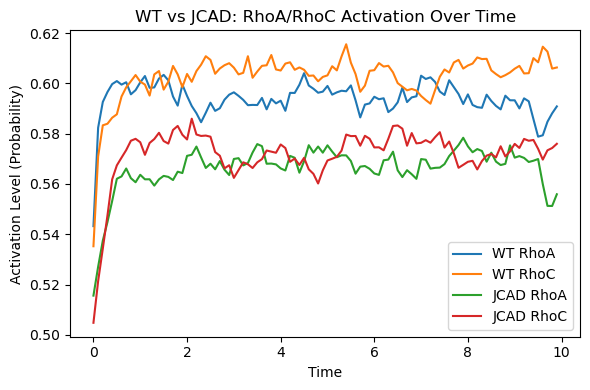

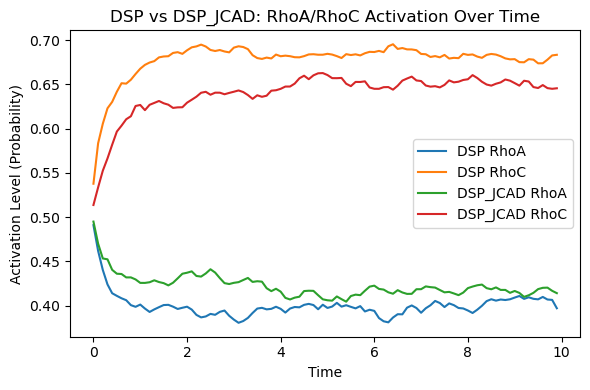

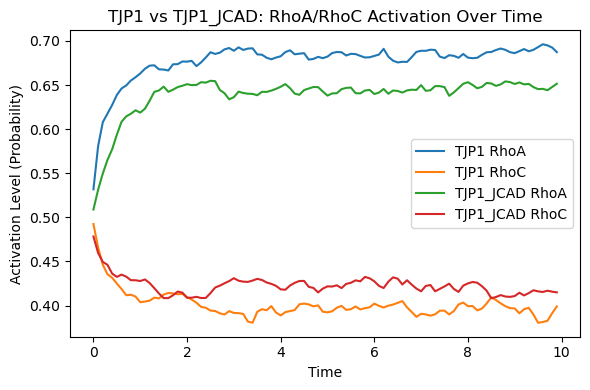

In [33]:
plot_activation_prob('WT vs JCAD', ['WT', 'JCAD'], perb_dfs, PERBS_FIG_DIR, set_ylim=False)
plot_activation_prob('DSP vs DSP_JCAD', ['DSP', 'DSP_JCAD'], perb_dfs, PERBS_FIG_DIR, set_ylim=False)
plot_activation_prob('TJP1 vs TJP1_JCAD', ['TJP1', 'TJP1_JCAD'], perb_dfs, PERBS_FIG_DIR, set_ylim=False)

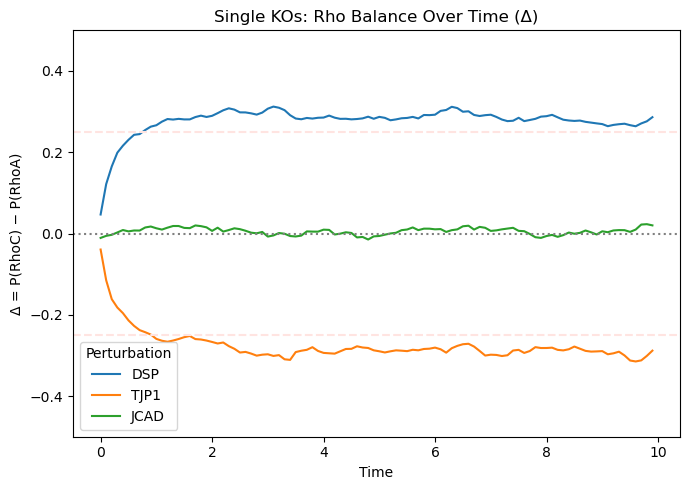

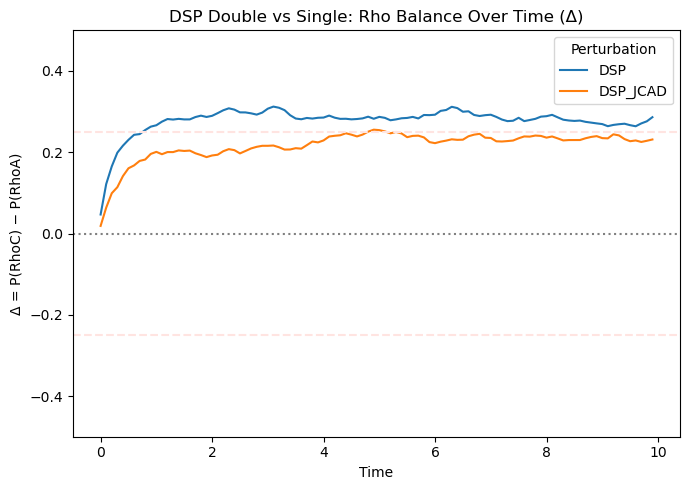

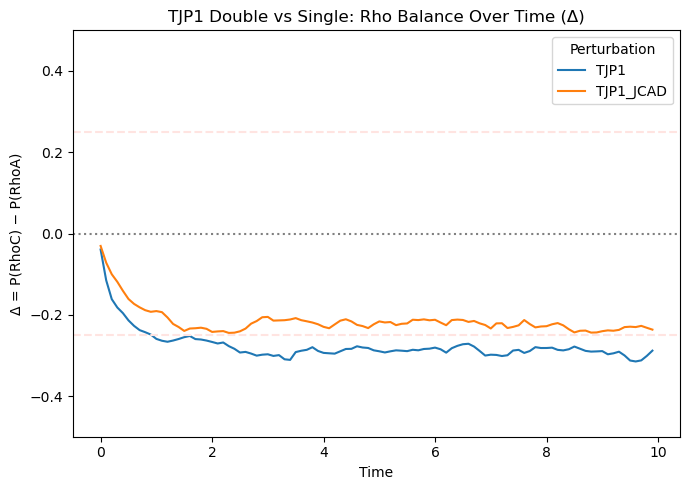

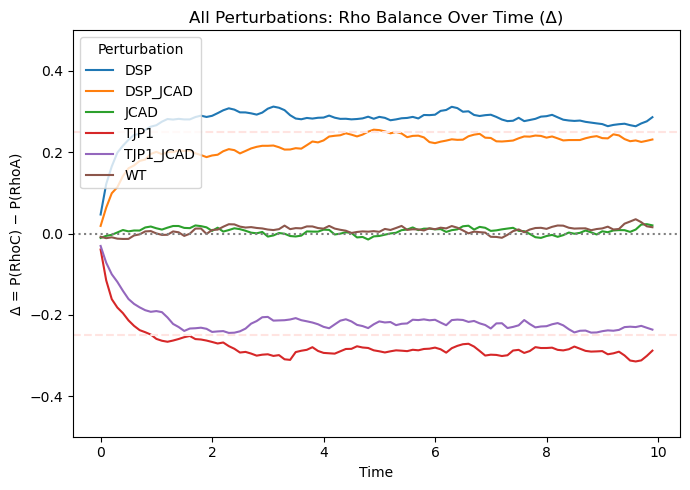

In [55]:
plot_deltas('Single KOs', ['DSP', 'TJP1', 'JCAD'], perb_dfs, PERBS_FIG_DIR)
plot_deltas('DSP Double vs Single', ['DSP', 'DSP_JCAD'], perb_dfs, PERBS_FIG_DIR)
plot_deltas('TJP1 Double vs Single', ['TJP1', 'TJP1_JCAD'], perb_dfs, PERBS_FIG_DIR)
plot_deltas('All Perturbations', perb_dfs.keys(), perb_dfs, PERBS_FIG_DIR)

## Perturbation Steady State Plots

In [116]:
def plot_ss_bar(df, outdir=None, save=True):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(df['perturbation'], df['delta'])

    ax.axhline(0.25, linestyle="--", color='red')
    ax.axhline(-0.25, linestyle="--", color='red')
    ax.axhline(0, linestyle=":", color='grey')

    ax.set_ylabel("Steady-State Δ")
    ax.set_ylabel("Perturbation")
    ax.set_title("Steady-State Rho Balances")

    plt.tight_layout()
    plt.show()

    if save and outdir is not None:
        outpath = outdir / "ss_balance_bar.png"
        fig.savefig(outpath, dpi=300)

    plt.show()

    plt.close(fig)


def save_df_as_png(df, filename, outdir = None, save=True, dpi=300):
    """
    Save a pandas DataFrame as a PNG image.
    """

    # Scale figure size based on dataframe shape
    nrows, ncols = df.shape

    fig, ax = plt.subplots(figsize=(ncols * 1.2, nrows * 0.4))
    ax.axis('off')

    table = ax.table(
        cellText=df.values,
        cellLoc='left',
        colLabels=df.columns.str.capitalize(),
        colColours=['lightblue']*ncols,
        loc='center'
    )


    table.auto_set_column_width(col=list(range(ncols)))
    table.scale(1, 1.2)

    # Bold header row
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')

    plt.tight_layout()
    if save and outdir is not None:
        outpath = outdir / "ss_table.png"
        fig.savefig(outpath, dpi=300)

    plt.show()
    plt.close(fig)

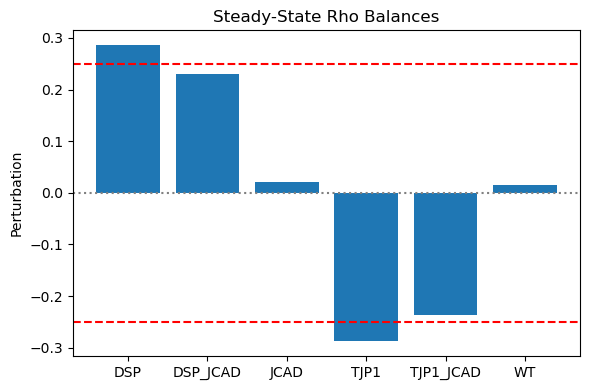

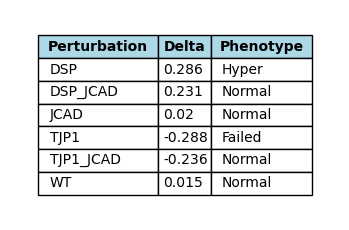

In [122]:
ss_df = perb_raw.loc[perb_raw.groupby('perturbation')['t'].idxmax()].reset_index(drop=True)
ss_df
ss_processed = ss_df[['perturbation', 'delta', 'phenotype']].round(3)
plot_ss_bar(ss_processed, PERBS_FIG_DIR)
save_df_as_png(ss_processed, "ss_table", PERBS_FIG_DIR)

In [ ]:
n_rows, n_cols = ss_processed.shape
list(range(n_cols))


[0, 1, 2]

## Parameter Sweep Processing

In [6]:
comp_df = sweep_dfs['2D_Competition_Landscape']
comp_df_wt = comp_df[comp_df['perb'] == 'WT']
comp_df_wt

,DSP,JCAD,RhoA,RhoC,TJP1,$RhoA_antagonistic,$RhoC_antagonistic,perb,exp_name,delta,phenotype
0,0.484200,0.515600,0.703276,0.707012,0.494800,1.0,1.0,WT,Competition_Landscape,0.003736,Normal
1,0.503399,0.499998,0.738358,0.596474,0.501199,1.0,2.0,WT,Competition_Landscape,-0.141884,Normal
2,0.495799,0.499000,0.753482,0.512530,0.501399,1.0,3.0,WT,Competition_Landscape,-0.240952,Normal
3,0.498599,0.499198,0.763089,0.464286,0.495199,1.0,4.0,WT,Competition_Landscape,-0.298803,Failed
4,0.483601,0.497401,0.776970,0.428229,0.490400,1.0,5.0,WT,Competition_Landscape,-0.348741,Failed
...,...,...,...,...,...,...,...,...,...,...,...
191,0.493199,0.500197,0.456482,0.574990,0.505800,14.0,10.0,WT,Competition_Landscape,0.118508,Normal
192,0.497200,0.500800,0.480526,0.555065,0.497201,14.0,11.0,WT,Competition_Landscape,0.074539,Normal
193,0.501001,0.508202,0.494328,0.537707,0.512001,14.0,12.0,WT,Competition_Landscape,0.043379,Normal
194,0.483599,0.497800,0.502742,0.525823,0.492199,14.0,13.0,WT,Competition_Landscape,0.023081,Normal


In [7]:
comp_pivot = comp_df_wt.pivot(index='$RhoA_antagonistic', columns='$RhoC_antagonistic', values='delta')
comp_pivot

$RhoC_antagonistic,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
$RhoA_antagonistic,,,,,,,,,,,,,,
1.0,0.003736,-0.141884,-0.240952,-0.298803,-0.348741,-0.369768,-0.393465,-0.444813,-0.466423,-0.481221,-0.521517,-0.532180,-0.542387,-0.558232
2.0,0.138429,0.008635,-0.106488,-0.170599,-0.210619,-0.260489,-0.303210,-0.323827,-0.368858,-0.383911,-0.382905,-0.411461,-0.430200,-0.459867
3.0,0.230588,0.081588,-0.003598,-0.073582,-0.133654,-0.185017,-0.203784,-0.241540,-0.275396,-0.325310,-0.317301,-0.338359,-0.375108,-0.365824
4.0,0.287856,0.163996,0.071500,0.003109,-0.064811,-0.119498,-0.147101,-0.177240,-0.202161,-0.257017,-0.255394,-0.281782,-0.279841,-0.297420
5.0,0.341457,0.243531,0.124112,0.060032,0.006371,-0.047578,-0.090598,-0.101599,-0.162128,-0.181498,-0.245679,-0.223125,-0.265540,-0.291296
6.0,0.384887,0.255378,0.194865,0.112203,0.029185,-0.009688,-0.063734,-0.070153,-0.117175,-0.158279,-0.172034,-0.186290,-0.233787,-0.232576
7.0,0.422061,0.294264,0.227609,0.158641,0.092289,0.038657,-0.001125,-0.014347,-0.055256,-0.088600,-0.144779,-0.140860,-0.180591,-0.207128
8.0,0.439015,0.362308,0.261882,0.188138,0.145793,0.072205,0.049634,0.004527,-0.018547,-0.081047,-0.062761,-0.108975,-0.123440,-0.159218
9.0,0.480918,0.360479,0.279354,0.199845,0.146622,0.121485,0.065631,0.039363,-0.011039,-0.020208,-0.074743,-0.067450,-0.087507,-0.147049


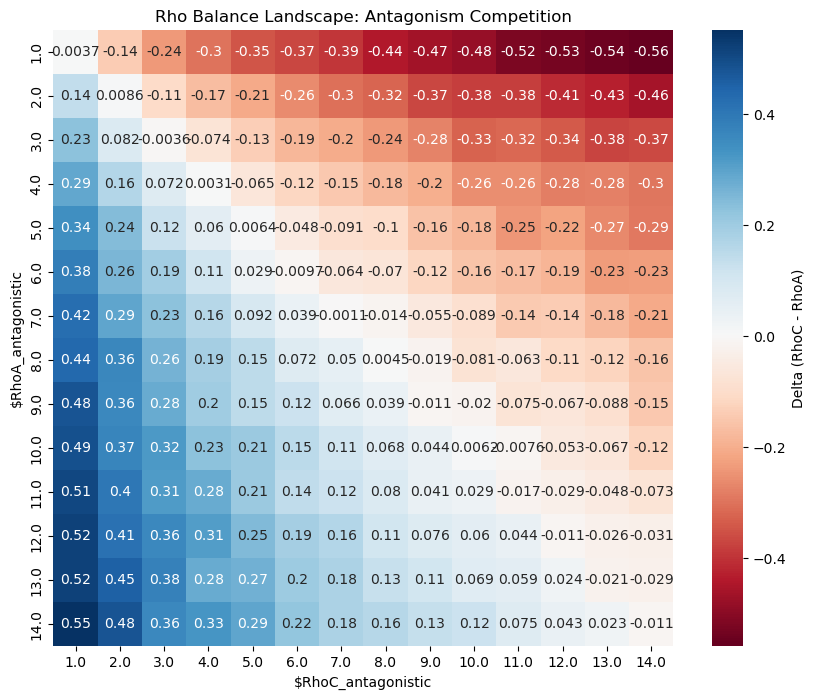

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(comp_pivot, 
            annot=True,       # Show values in cells
            cmap="RdBu",      # Red (A) to Blue (C)
            center=0,         # Force 0 to be the neutral color
            cbar_kws={'label': 'Delta (RhoC - RhoA)'})

plt.title("Rho Balance Landscape: Antagonism Competition")
plt.show()